In [7]:
%pip install matplotlib
%pip install pyserial

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import serial
import time
import csv

In [2]:
system_frequency = 60
seconds = 10
average_seconds = 2

average_samples = system_frequency * average_seconds
total_samples = system_frequency * seconds

In [4]:
power_vision = serial.Serial(
    port='COM7',
    baudrate=115200,
)

voltage_a_rms_array = []
frequency = []
time_in_ms = []
average_voltage_a_rms_array = []
average_frequency_array = []

number_of_samples = 0
start_time = time.time()
while number_of_samples < total_samples:
    data = power_vision.readline().decode().strip();
    if data:
        data = data.split(',')
        try:
            voltage_a_rms_array.append(float(data[0]))
            #frequency.append(int(data[1]))
            time_in_ms.append(time.time() - start_time)
            
            voltage_rms_length = len(voltage_a_rms_array)
            start = len(voltage_a_rms_array) - average_samples if len(voltage_a_rms_array) > average_samples else 0

            average_voltage_a_rms = sum(voltage_a_rms_array[start:]) / (voltage_rms_length - start)
            average_voltage_a_rms_array.append(average_voltage_a_rms)
            number_of_samples+=1
        except ValueError:
            continue

power_vision.close()

In [28]:
power_vision.close()

214.06241666666668


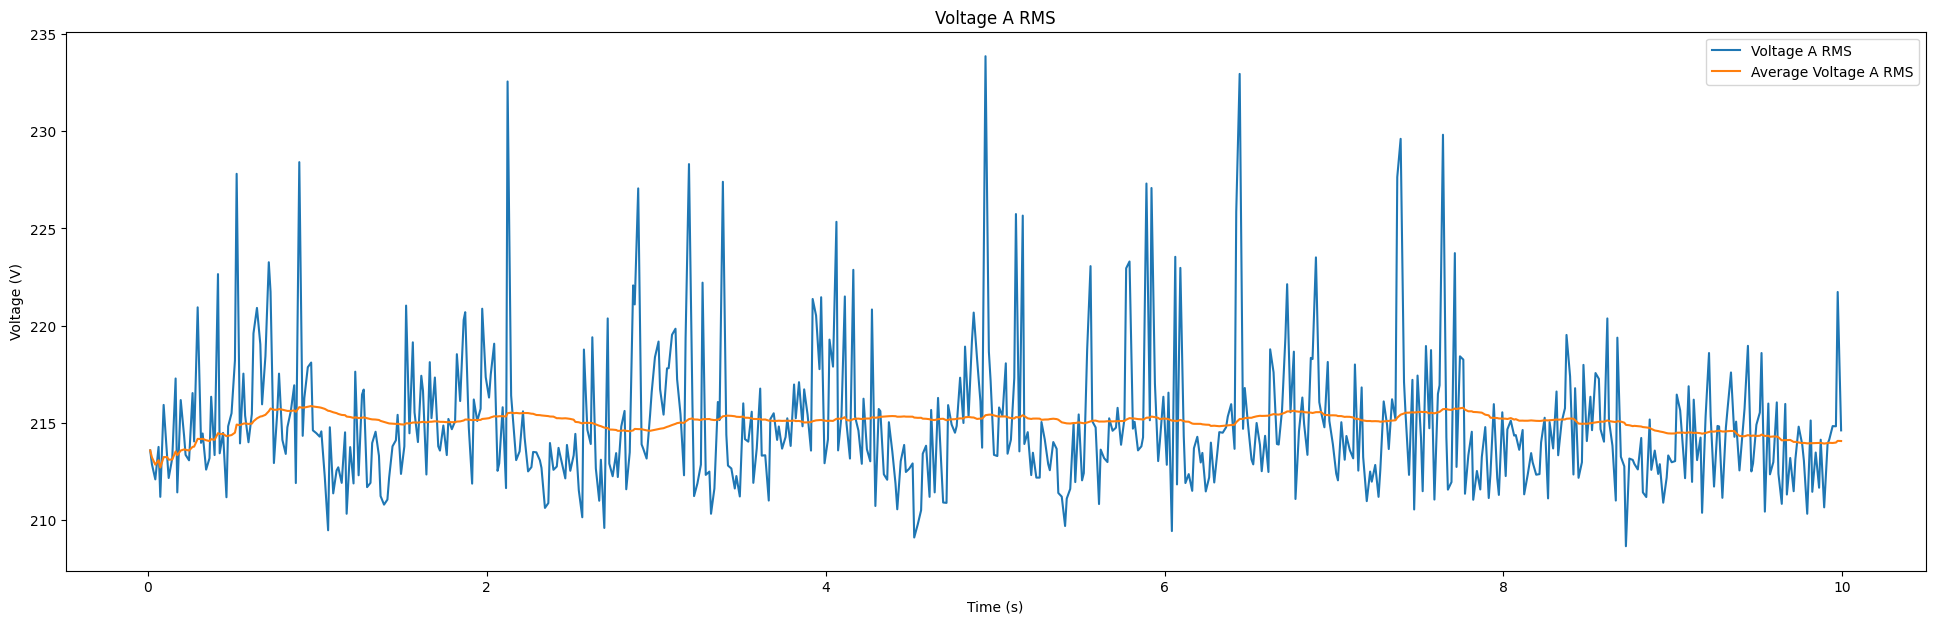

In [5]:
print(average_voltage_a_rms_array[-1])
plt.figure(figsize=(24, 7))
plt.title('Voltage A RMS')
plt.plot(time_in_ms, voltage_a_rms_array, label='Voltage A RMS')
plt.plot(time_in_ms, average_voltage_a_rms_array, label='Average Voltage A RMS')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.show()

59.100459461444444


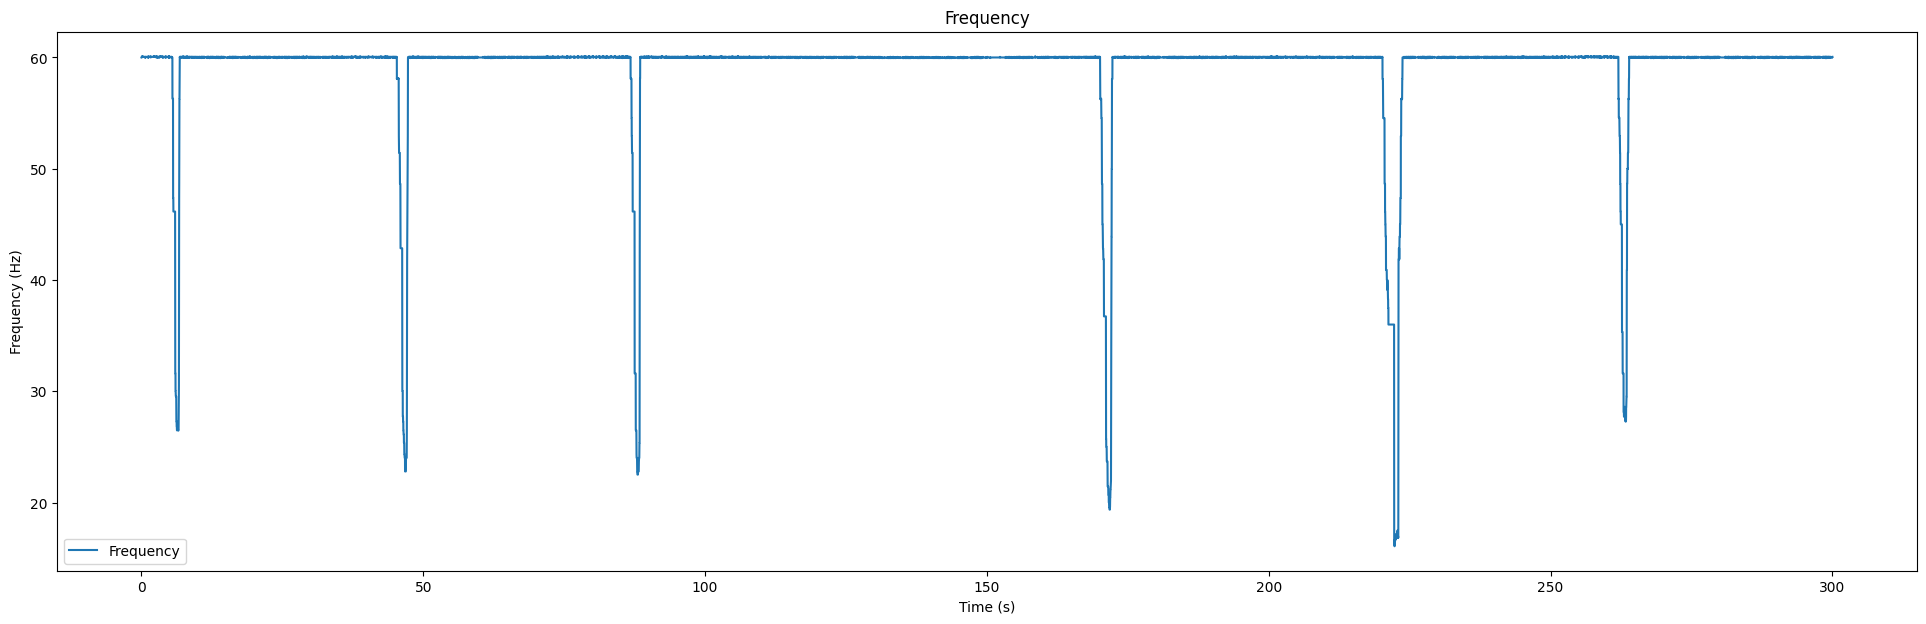

In [7]:
print(sum(frequency) / len(frequency))
plt.figure(figsize=(24, 7))
plt.title('Frequency')
plt.plot(time_in_ms, frequency, label='Frequency')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.show()

In [8]:
timestamp = time.strftime('%Y%m%d-%H%M%S')
with open(f"./data/{total_samples}-voltage_a_rms-{timestamp}.csv", mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Voltage A RMS', 'Average Voltage A RMS, frequency'])
    for index in range(total_samples):
        writer.writerow([voltage_a_rms_array[index], average_voltage_a_rms_array[index], frequency[index]])

print('Data exported to voltage_a_rms.csv')

Data exported to voltage_a_rms.csv
